# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1055.
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           2.11e-42
Time:                        16:04:28   Log-Likelihood:                 3.2294
No. Observations:                  50   AIC:                             1.541
Df Residuals:                      46   BIC:                             9.189
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9170      0.081     61.000      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.374651    4.87696612  5.33840484  5.73084766  6.03632325  6.2499611
  6.38079175  6.45026306  6.48871642  6.53040173  6.60785024  6.74652976
  6.96066037  7.25087811  7.60413045  7.99582083  8.39384977  8.76388872
  9.07502018  9.30481734  9.4430287   9.49326245  9.47239356  9.40779133
  9.3328227   9.28137009  9.28226468  9.35454951  9.50435074  9.72387118
  9.99267129 10.28102739 10.55481518 10.7811162  10.93362632 10.99697737
 10.96926214 10.86234768 10.69992563 10.51361969 10.33778998 10.20388778
 10.13528811 10.14344934 10.22603061 10.36727638 10.54060506 10.7129763
 10.85031938 10.92313097]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.89597424 10.73204483 10.45157685 10.10068126  9.74005631  9.43012649
  9.21624851  9.11760638  9.12251452  9.19127877]


## Plot comparison

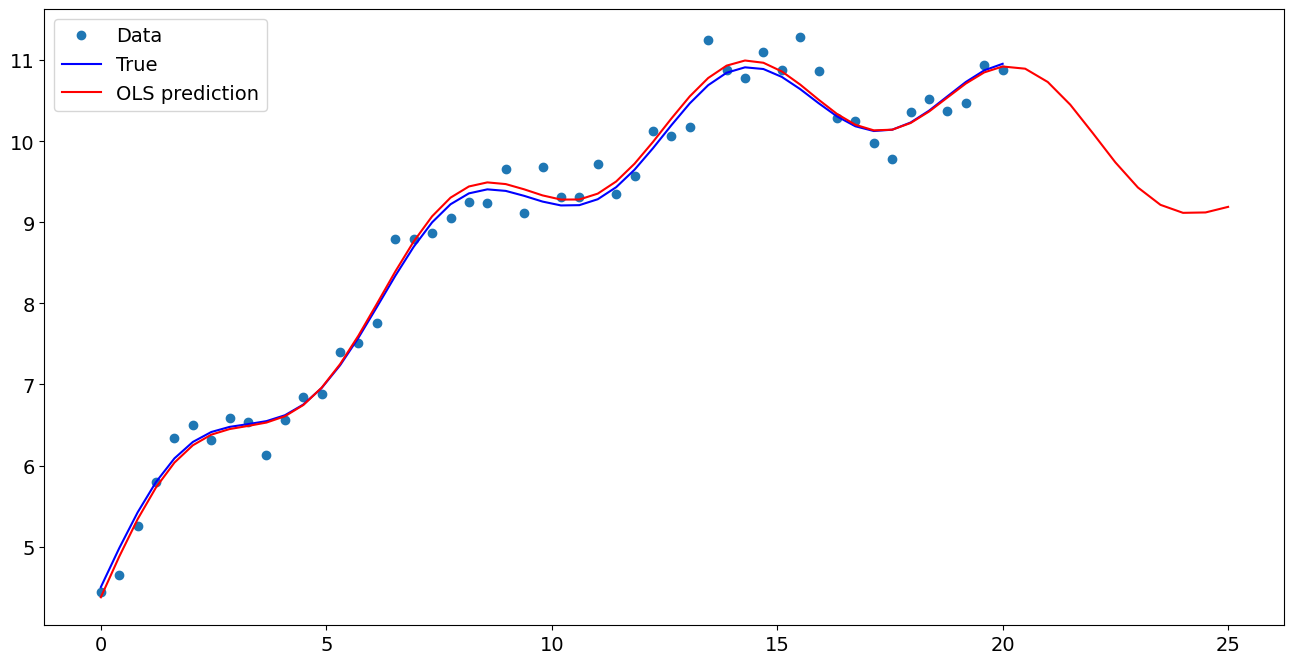

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.917026
x1                  0.520822
np.sin(x1)          0.515963
I((x1 - 5) ** 2)   -0.021695
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.895974
1    10.732045
2    10.451577
3    10.100681
4     9.740056
5     9.430126
6     9.216249
7     9.117606
8     9.122515
9     9.191279
dtype: float64